<a href="https://colab.research.google.com/github/Umang-Lodaya/Stock-Market-Trend-Prediction/blob/main/Stock_Market_Trend_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# pip install yfinance

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# For reading stock data from yahoo
import yfinance as yf
from datetime import datetime
from pandas_datareader import data as pdr
from pandas_datareader.data import DataReader
yf.pdr_override()

In [4]:
# The tech stocks we'll use for this analysis
stock = 'TSLA'

# Set up End and Start times for data grab
end = datetime.now()
start = datetime(2000, 1, 1)
start = '2020-01-01'

df = yf.download(stock, start, end)
df.tail(10)

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-06,198.539993,198.600006,192.300003,193.809998,193.809998,128100100
2023-03-07,191.380005,194.199997,186.100006,187.710007,187.710007,148125800
2023-03-08,185.039993,186.500000,180.000000,182.000000,182.000000,151897800
2023-03-09,180.250000,185.179993,172.509995,172.919998,172.919998,170023800
2023-03-10,175.130005,178.289993,168.440002,173.440002,173.440002,191007900
2023-03-13,167.460007,177.350006,163.910004,174.479996,174.479996,167790300
2023-03-14,177.309998,183.800003,177.139999,183.259995,183.259995,143717900
2023-03-15,180.800003,182.339996,176.029999,180.449997,180.449997,145995600
2023-03-16,180.369995,185.809998,178.839996,184.130005,184.130005,121374500


In [5]:
# Summary Stats
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,808.000000,808.000000,808.000000,808.000000,808.000000,8.080000e+02
mean,204.215570,209.047441,198.904644,204.078910,204.078910,1.351526e+08
std,93.726468,95.647854,91.438290,93.498911,93.498911,9.804355e+07
min,24.980000,26.990667,23.367332,24.081333,24.081333,2.940180e+07
25%,138.487507,141.930000,135.452499,138.270828,138.270828,7.078252e+07
50%,219.631668,223.550003,213.348335,218.920006,218.920006,9.834560e+07
75%,272.669991,280.696663,265.872498,271.783333,271.783333,1.755379e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [6]:
# General info
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 808 entries, 2020-01-02 to 2023-03-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       808 non-null    float64
 1   High       808 non-null    float64
 2   Low        808 non-null    float64
 3   Close      808 non-null    float64
 4   Adj Close  808 non-null    float64
 5   Volume     808 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 44.2 KB


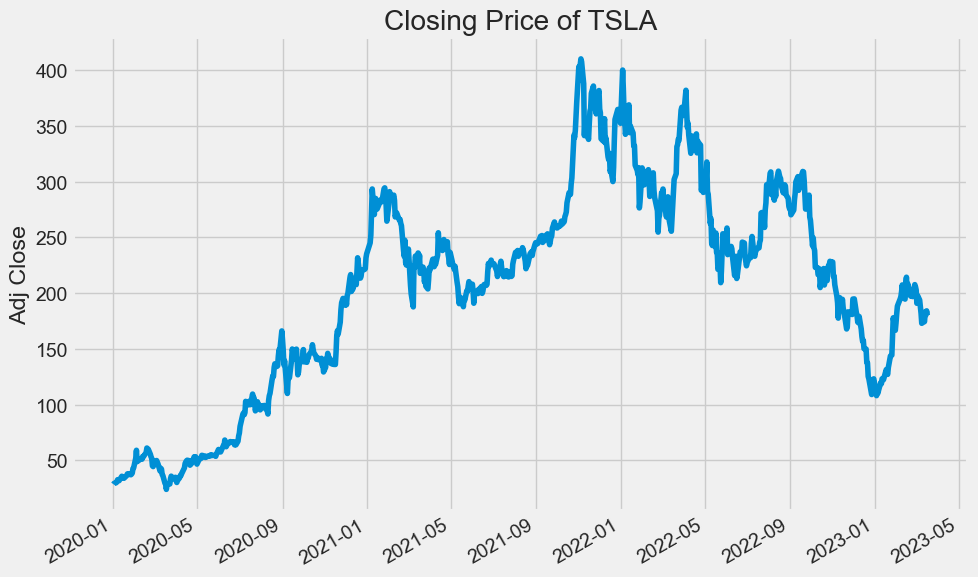

In [7]:
# Let's see a historical view of the closing price
plt.figure(figsize=(10, 6))
df['Adj Close'].plot()
plt.ylabel('Adj Close')
plt.xlabel(None)
plt.title(f"Closing Price of {stock}")
    
plt.tight_layout()
plt.show()

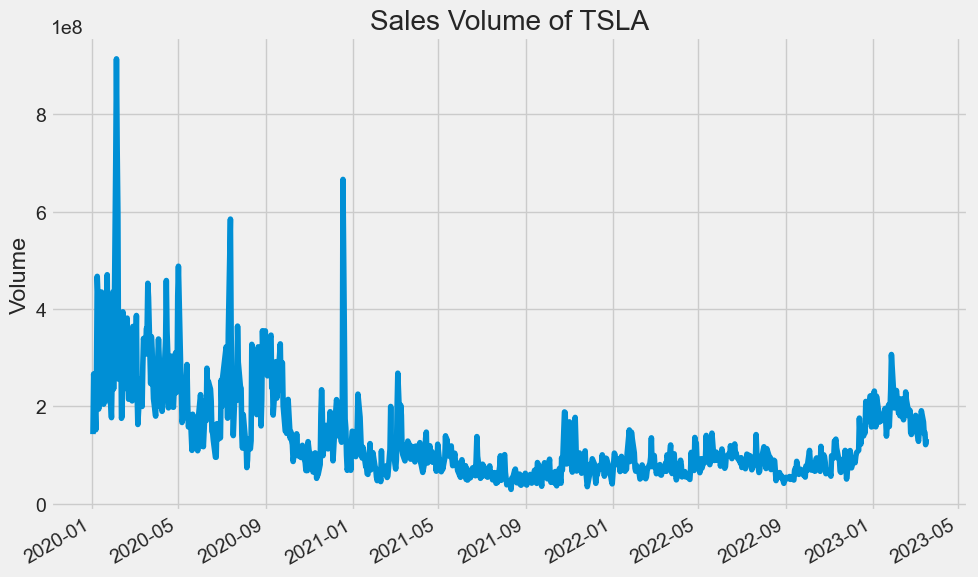

In [8]:
# Now let's plot the total volume of stock being traded each day
plt.figure(figsize=(10, 6))
df['Volume'].plot()
plt.ylabel('Volume')
plt.xlabel(None)
plt.title(f"Sales Volume of {stock}")
    
plt.tight_layout()
plt.show()

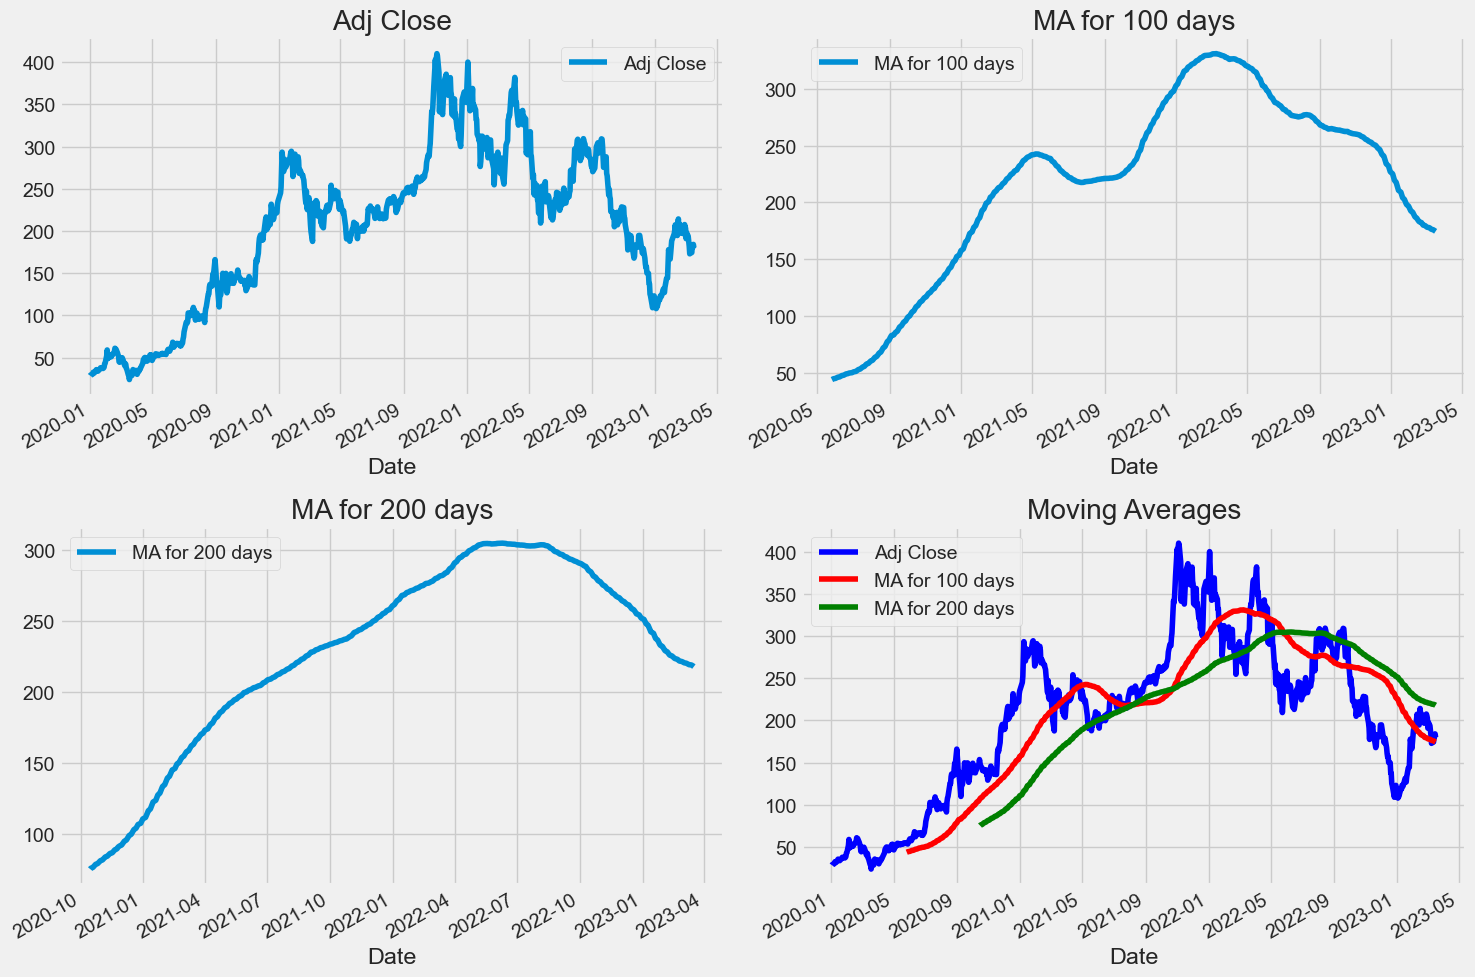

In [20]:
ma_day = [100, 200, 300]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['Adj Close'].rolling(ma).mean()
        
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

df[['Adj Close']].plot(ax=axes[0,0])
axes[0,0].set_title('Adj Close')

df[['MA for 100 days']].plot(ax=axes[0,1])
axes[0,1].set_title('MA for 100 days')

df[['MA for 200 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MA for 200 days')


df[['Adj Close']].plot(ax=axes[1,1], color='blue')
df[['MA for 100 days']].plot(ax=axes[1,1], color='red')
df[['MA for 200 days']].plot(ax=axes[1,1], color='green')
axes[1,1].set_title('Moving Averages')
axes[1,1].legend(['Adj Close', 'MA for 100 days', 'MA for 200 days'])

fig.tight_layout()
plt.show()

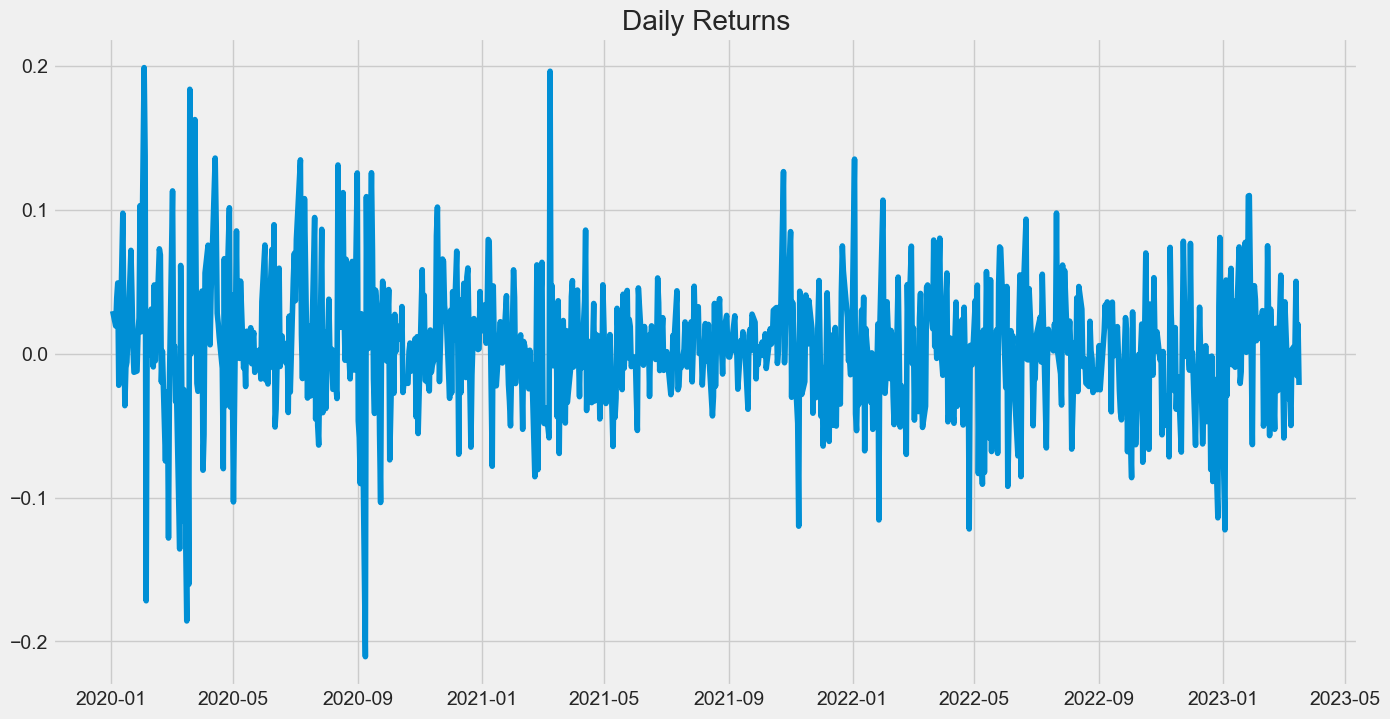

In [ ]:
# We'll use pct_change to find the percent change for each day
df['Daily Return'] = df['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
plt.figure(figsize=(15, 8))
plt.plot(df['Daily Return'])
plt.title('Daily Returns')
plt.show()

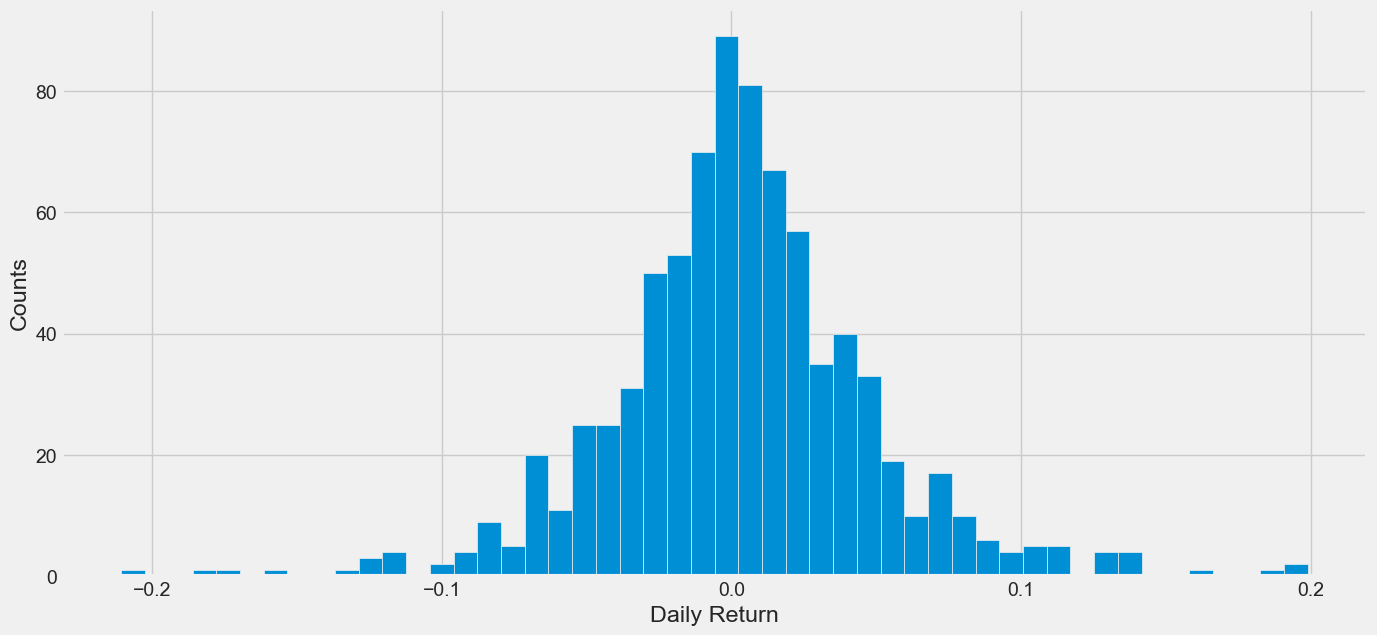

In [ ]:
fig = plt.figure(figsize=(15, 7))
df['Daily Return'].hist(bins=50)
plt.xlabel('Daily Return')
plt.ylabel('Counts')
plt.show()

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start=start, end=datetime.now())
# Show teh data
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,74.059998,75.150002,73.797501,75.087502,73.449394,135480400
2020-01-03,74.287498,75.144997,74.125000,74.357498,72.735321,146322800
2020-01-06,73.447502,74.989998,73.187500,74.949997,73.314880,118387200
2020-01-07,74.959999,75.224998,74.370003,74.597504,72.970078,108872000
2020-01-08,74.290001,76.110001,74.290001,75.797501,74.143906,132079200


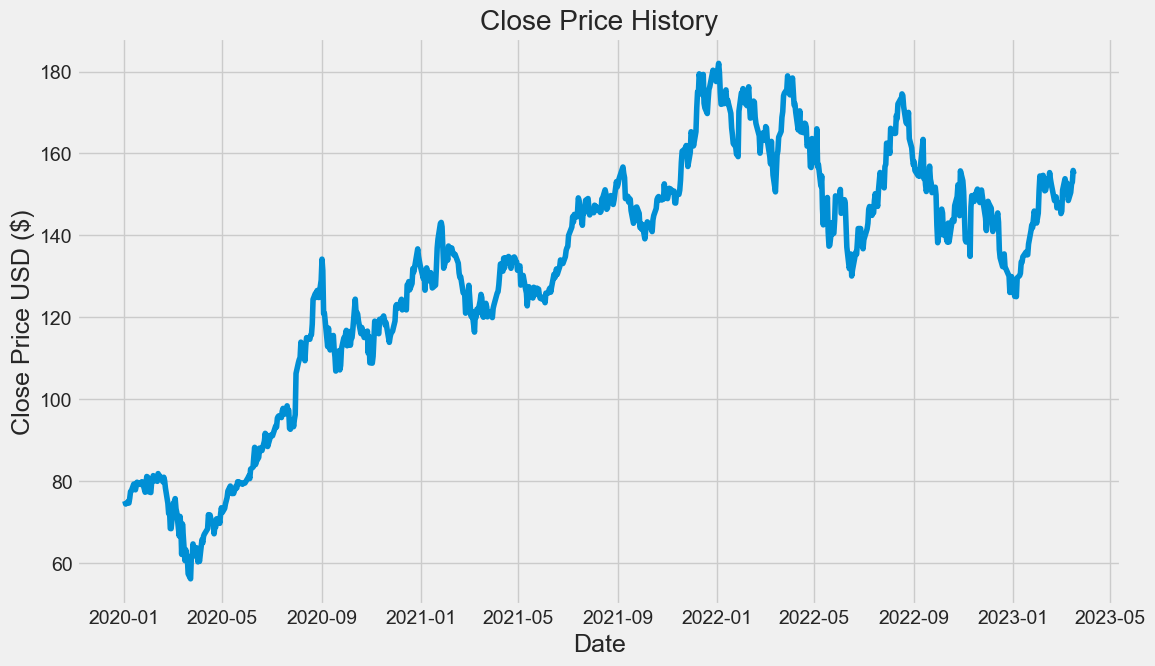

In [ ]:
plt.figure(figsize=(12,7))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column 
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

768

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.15085277],
       [0.14505529],
       [0.14976075],
       [0.14696135],
       [0.15649137],
       [0.16927753],
       [0.17066729],
       [0.18383068],
       [0.17533306],
       [0.17267259],
       [0.18041574],
       [0.18734493],
       [0.1830564 ],
       [0.18529994],
       [0.18833764],
       [0.18651102],
       [0.16792745],
       [0.18528007],
       [0.19848314],
       [0.19754999],
       [0.16903929],
       [0.16735166],
       [0.18758317],
       [0.19274529],
       [0.20021045],
       [0.18992596],
       [0.19294378],
       [0.18909205],
       [0.2041615 ],
       [0.19953542],
       [0.19969428],
       [0.18788097],
       [0.19705363],
       [0.190462  ],
       [0.17606765],
       [0.14654436],
       [0.12649154],
       [0.13556496],
       [0.09758373],
       [0.09726605],
       [0.14779519],
       [0.12895351],
       [0.15559791],
       [0.13610106],
       [0.12837772],
       [0.08299089],
       [0.12105149],
       [0.101

In [ ]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=1)

23/23 [==============================] - 8s 115ms/step - loss: 0.0445


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 [==============================] - 1s 13ms/step


4.141296003586953

C:\Users\bhowm\AppData\Local\Temp\ipykernel_18624\744002329.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


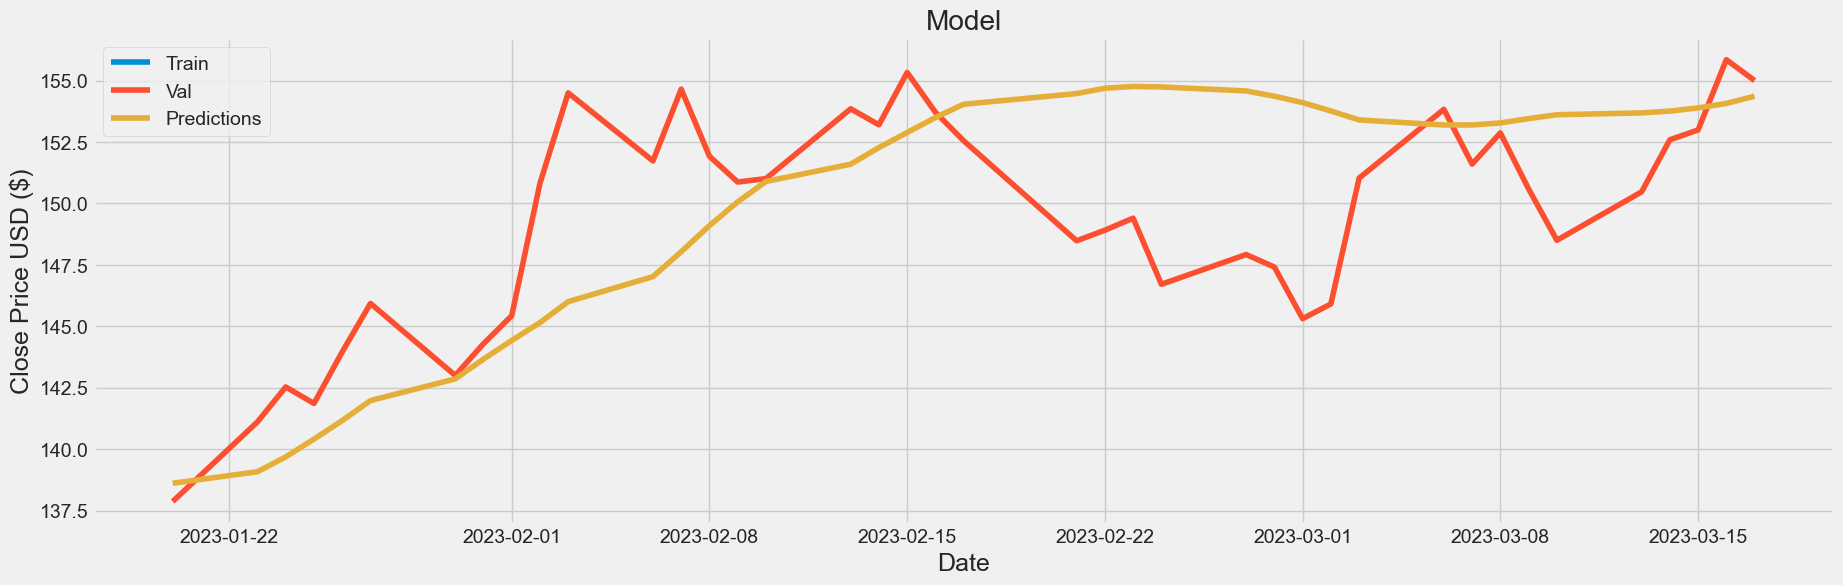

In [ ]:
# Plot the data
train = data.iloc[5300:training_data_len, :]
valid = data.iloc[training_data_len:, :]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(20, 6))

plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='best')

plt.show()